In [152]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; %txt(1:n-8);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cutableaus']; addpath(Cumodelspath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 

In [153]:
% put in constants
VT=0.05; %total volume
stockCuconc=0.0152067;

In [154]:
% put in data
data=[...
%time hr	time min	time total	cumulative  vol added	pH	mvA	delta
%0	35	35	0	2.06	88.3	0.159999999999999
%0	40	40	0	2.053	88.3	0
%0	45	45	0	2.056	89.2	0.180000000000001
%0	50	50	0	2.055	88.9	-0.0599999999999994
%0	55	55	0	2.056	89.2	0.0599999999999994
%1	0	60	0	2.056	91	0.359999999999999
1	18	78	0	2.056	87.5	-0.194444444444444
%1	19	79	50	2.058	87.4	-0.0999999999999943
%1	25	85	50	2.054	93.1	0.949999999999998
%1	30	90	50	2.057	96.3	0.640000000000001
%1	35	95	50	2.054	94.7	-0.319999999999999
%1	40	100	50	2.056	97	0.459999999999999
%1	45	105	50	2.052	97.6	0.119999999999999
%1	55	115	50	2.049	97.4	-0.0199999999999989
%2	0	120	50	2.053	98	0.119999999999999
%2	5	125	50	2.053	99.4	0.280000000000001
%2	10	130	50	2.044	98.4	-0.2
%2	15	135	50	2.045	97.6	-0.160000000000002
2	20	140	50	2.042	97.4	-0.0399999999999977
2	25	145	50	2.018	97.7	0.0599999999999994
%2	30	147	150	2.019	98.2	0.25
%2	32	152	150	2.016	103	0.959999999999999
%2	37	157	150	2.018	104	0.2
%2	42	162	150	2.015	105.1	0.219999999999999
%2	47	167	150	2.014	104.5	-0.119999999999999
%2	52	172	150	2.014	103.5	-0.2
%2	57	177	150	2.011	104	0.1
%3	2	182	150	2.011	106.3	0.459999999999999
%3	7	187	150	2.009	105.5	-0.159999999999999
%3	12	192	150	2.01	107	0.3
%3	17	197	150	2.009	106.5	-0.1
3	22	202	150	2.009	106.4	-0.0199999999999989
3	27	207	150	2.011	106.6	0.0399999999999977
%3	30	210	400	2.011	111	1.46666666666667
%3	35	215	400	2.011	114.9	0.780000000000001
%3	40	220	400	2.012	115.2	0.0599999999999994
%3	50	230	400	2.01	117.8	0.259999999999999
%3	55	235	400	2.01	118.3	0.1
%4	0	240	400	2.009	118.5	0.0400000000000006
%4	5	245	400	2.009	118.7	0.0400000000000006
%4	10	250	400	2.008	117.1	-0.320000000000002
%4	15	255	400	2.008	118	0.180000000000001
4	20	260	400	2.008	116.7	-0.259999999999999
4	25	265	400	2.007	116.6	-0.0200000000000017
%4	27	267	900	2.011	119	1.2
%4	32	272	900	2.011	123.7	0.940000000000001
%4	37	277	900	2.01	124.7	0.2
%4	42	282	900	2.011	126.2	0.3
%4	47	287	900	2.011	126.1	-0.0200000000000017
4	52	292	900	2.01	126.3	0.0400000000000006
4	57	297	900	2.011	126.2	-0.0199999999999989
%5	0	300	1900	2.018	131.8	1.86666666666667
%5	5	305	1900	2.017	134.3	0.5
%5	10	310	1900	2.018	135.6	0.259999999999997
%5	15	315	1900	2.018	134.7	-0.180000000000001
%5	20	320	1900	2.018	135.4	0.140000000000003
%5	25	325	1900	2.019	135	-0.0800000000000011
%5	30	330	1900	2.018	136.4	0.280000000000001
5	35	335	1900	2.018	136.5	0.0199999999999989
5	40	340	1900	2.018	135.5	-0.2
];

addedCuvol=data(:,4)'*1e-6;

originalsamplemVnpH=[...
%time hr	time min	time total	cumulative  vol added	pH	mvA	delta
%0	0	0	0	6.097	57.3	
%0	5	5	0	6.051	80.8	4.7
%0	10	10	0	6.071	83.8	0.6
%0	15	15	0	6.093	87.7	0.780000000000001
%0	20	20	0	6.101	87.7	0
0	25	25	0	6.079	87.8	0.0199999999999989
0	30	30	0	6.095	87.5	-0.0599999999999994
];

In [155]:
% process the data
pH=mean(originalsamplemVnpH(:,5))
mVAoriginal=mean(originalsamplemVnpH(:,6));
mVAoriginal=(originalsamplemVnpH(:,6));

mVA=data(:,6)'; Emeas=mVA; CuTmeas=1e-6; CuT=CuTmeas;
%mest=mVA(3)-mVA(2)
CuTplus=(CuTmeas*(VT)+addedCuvol*stockCuconc)./(VT+addedCuvol);

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

param=polyfit(log10(CuTplus(2:end)),Emeas(2:end),1)
paramlinear=polyfit(log10(CuTplus(2:end)),Emeas(2:end),1)
logCuToriginal=(Emeas(1:2)-param(2))/param(1);
CuToriginal=(10.^logCuToriginal)*63.546*1e6;
logCuoriginal=mean((mVAoriginal-param(2))/param(1));


pH = 6.0870e+00


param,1,2
1,25.0081,215.926


paramlinear,1,2
1,25.0081,215.926


In [156]:
% try one point, assume Nernst slope
m=59.2/2; Eacid=mean(Emeas(1:2)); Eorig=mean(mVAoriginal); m=paramlinear(1);
Eo=Eacid-(m)*log10(CuT);
logCuonept=(Eorig-Eo)/m

logCuonept = -6.1919e+00


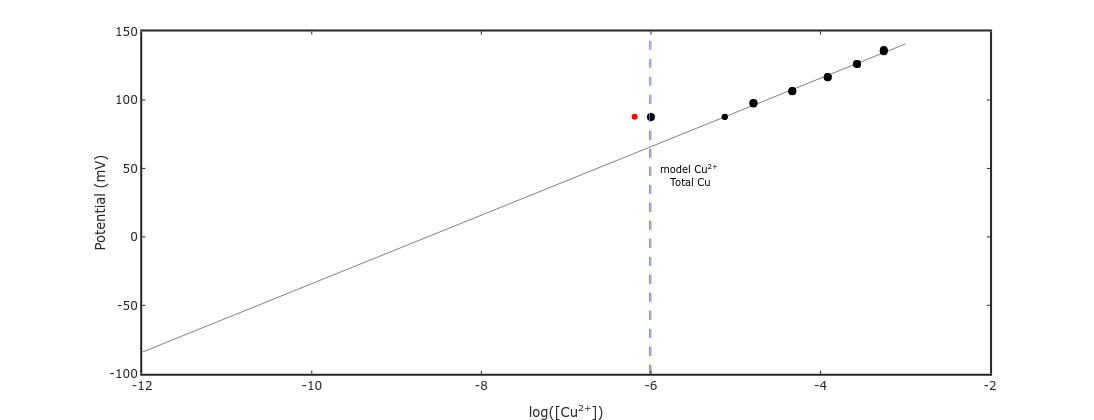

logCunosolid = -6.0162e+00


logCuoriginalsample = -5.1294e+00


logCuonept = -6.1919e+00


In [157]:
% MODEL FOR COMPARISON

%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

CuT=CuTmeas; inorganicTOTALS=[CuT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;
pe=20.75-pH; PCO2=10^-3.5;
[Cuall,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauallsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[CuwithCuOs,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauCuOs(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[Cunosolid,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableaunosolid(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);

plot(log10(CuTplus),Emeas,'ko','markersize',8)

hold on
plot([logCuoriginal'],[mVAoriginal'],'ko')
logCuplot=-12:0.1:-3; Eplot=polyval(param,logCuplot);
plot(logCuplot,Eplot,'k-')
set(gca,'linewidth',2)
xlabel('log[Cu^{2+}]'); ylabel('E (mV)')
hold on

plot([log10(Cuall) log10(Cuall)],[-100 100],'r--')
plot([log10(Cunosolid) log10(Cunosolid)],[-100 150],'m--'); hold on
plot([log10(CuwithCuOs) log10(CuwithCuOs)],[-100 150],'g--'); hold on
plot([log10(CuT) log10(CuT)],[-100 150],'b--')
%plot([-9.576 -9.576],[-100 100],'b--')

text(log10(Cunosolid)+0.1,50,'model Cu^{2+}','rotation',90)
text(log10(CuT)+0.2,40,'Total Cu','rotation',90)


xlabel('log([Cu^{2+}])')
ylabel('Potential (mV)')
set(gca,'LineWidth',2,'fontsize',12)

logCunosolid=log10(Cunosolid)
logCuoriginalsample=mean((mVAoriginal-param(2))/param(1))
logCuonept

plot(logCuonept,Eorig,'ro','markerfacecolor','r')
